In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rm_sim as sim
import sys
from matplotlib.ticker import MaxNLocator
from matplotlib.backends.backend_tkagg import NavigationToolbar2Tk

from RMutils.util_plotTk import plot_rmsf_fdf_fig # origanl ploting function

#sys.path.append'\users\afine\surp2020\CTA200_project\RM-Tools\RM-Tools>')
from RMtools_1D.do_RMsynth_1D1 import run_rmsynth
from RMutils.util_misc import progress
from RMutils.util_plotTk import gauss
from RMutils.util_plotTk import tweakAxFormat

import scipy as sp

# Inputs

In [2]:
#Simulation inputs: 


p = 1
rm = 30000
xi_knot = 0
f_low = 800e6
f_high = 1088e6 
f_n = 260
s = 0.003
width = 3000
phiMax_radm2 = 50000

p2 = 0 # p for empirical noise
q_curve = True
q_samples = 3

file_name = 'sim_test1'

# additonal stuff
polyOrd = 2
dPhi_radm2 = None
nSamples = 10
weightType = "variance"
fitRMSF = True
units = "Jy/beam"
verbose = False
debug = False
showPlots = False
noStokesI = True
nBits = 64


n = f_n
# phi 

C = 2.997924538e8 # Speed of light [m/s]



# generate sim data 

In [3]:
# generate sim data 

f = np.linspace(f_low, f_high, f_n)
ban = sim.bandwidth(f)

p_tilda = sim.bandwidth_avg_array(f, ban, rm, xi_knot, p)
size_f = len(f)
noise_1 =  np.random.normal(0, s, size_f)
noise_2 =  np.random.normal(0, s, size_f)
dq = s * np.ones(size_f)
du = s * np.ones(size_f)
q = np.real(p_tilda) + noise_1
u = np.imag(p_tilda) + noise_2
p_tilda = q + 1.0j * u

p_tilda_orig = p_tilda



#imput_data = list = [freq_Hz, q, u,  dq, du]
data=[f, np.real(p_tilda), np.imag(p_tilda), dq, du]




# Run RM-synthesis on the spectra

e_num = 1
mDict1, aDict1 = run_rmsynth(data           = data,
            polyOrd = polyOrd,
            phiMax_radm2 = phiMax_radm2,
            dPhi_radm2 = dPhi_radm2,
            nSamples       = nSamples,
            weightType     = weightType,
            fitRMSF        = fitRMSF,
            noStokesI      = noStokesI,
            nBits          = nBits,
            showPlots      = showPlots,
            debug          = debug,
            verbose        = verbose,
            units          = units,
            e_num          = e_num)
e_num = 2
mDict2, aDict2 = run_rmsynth(data           = data,
            polyOrd = polyOrd,
            phiMax_radm2 = phiMax_radm2,
            dPhi_radm2 = dPhi_radm2,
            nSamples       = nSamples,
            weightType     = weightType,
            fitRMSF        = fitRMSF,
            noStokesI      = noStokesI,
            nBits          = nBits,
            showPlots      = showPlots,
            debug          = debug,
            verbose        = verbose,
            units          = units,
            e_num          = e_num)

e_num = 3
mDict3, aDict3= run_rmsynth(data           = data,
            polyOrd = polyOrd,
            phiMax_radm2 = phiMax_radm2,
            dPhi_radm2 = dPhi_radm2,
            nSamples       = nSamples,
            weightType     = weightType,
            fitRMSF        = fitRMSF,
            noStokesI      = noStokesI,
            nBits          = nBits,
            showPlots      = showPlots,
            debug          = debug,
            verbose        = verbose,
            units          = units,
            e_num          = e_num)

e_num = 4
mDict4, aDict4 = run_rmsynth(data           = data,
            polyOrd = polyOrd,
            phiMax_radm2 = phiMax_radm2,
            dPhi_radm2 = dPhi_radm2,
            nSamples       = nSamples,
            weightType     = weightType,
            fitRMSF        = fitRMSF,
            noStokesI      = noStokesI,
            nBits          = nBits,
            showPlots      = showPlots,
            debug          = debug,
            verbose        = verbose,
            units          = units,
            e_num          = e_num)
    


In [4]:
# FDF

def plot_dirtyFDF_ax(ax, phiArr, FDFArr, e, gaussParm=[], vLine=None,
                     title="Dirty FDF", axisYright=False, axisXtop=False,
                     doTitle=False,units=''):

    # Set the axis positions
    if axisYright:
        ax.yaxis.tick_right()
        ax.yaxis.set_label_position("right")
    if axisXtop:
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position("top")
        
    # Plot the FDF
    FDFpiArr = np.sqrt( np.power(FDFArr.real, 2.0) +
                            np.power(FDFArr.imag, 2.0) )
    #ax.step(phiArr, np.real(FDFArr), where='mid', color='b', lw=0.5,  # FDFArr.real
           # label='Real')
    #ax.step(phiArr, np.imag(FDFArr), where='mid', color='r', lw=0.5, # FDFArr.imag,
            #label='Imaginary')
    ax.step(phiArr, FDFpiArr, where='mid', lw=1.0,
            label='PI')
    if doTitle==True:
        ax.text(0.05, 0.84, "Dirty FDF" + str(e), transform=ax.transAxes)

    # Plot the Gaussian peak
    if len(gaussParm)==3:
        # [amp, mean, FWHM]
        phiTrunkArr = np.where(phiArr>=gaussParm[1]-gaussParm[2]/3.0,
                               phiArr, np.nan)
        phiTrunkArr = np.where(phiArr<=gaussParm[1]+gaussParm[2]/3.0,
                               phiTrunkArr, np.nan)
        yGauss = gauss(gaussParm)(phiTrunkArr)
        ax.plot(phiArr, yGauss, color='magenta',marker='None',mfc='w',
                mec='g', ms=10, label='Peak Fit', lw=2.5, ls='-')

    # Plot a vertical line
    if vLine:
        ax.axvline(vLine, color="magenta", ls="--", linewidth=1.5)

    # Scaling
    ax.yaxis.set_major_locator(MaxNLocator(4))
    ax.xaxis.set_major_locator(MaxNLocator(8))
    xRange = np.nanmax(phiArr)-np.nanmin(phiArr)
   # ax.set_xlim( np.nanmin(phiArr) - xRange*0.01,
    #             np.nanmax(phiArr) + xRange*0.01)
    ax.set_xlim(rm - width, rm + width)
    #ax.set_ylim(0,1.5)
    ax.set_ylabel('Flux Density ('+units+')')
    ax.set_xlabel('$\phi$ (rad m$^{-2}$)')
    ax.axhline(0, color='grey')

    # Format tweaks
    ax = tweakAxFormat(ax)
    ax.autoscale_view(True,True,True)

# modified plotting stuff

    # aDict = dict()
    # aDict["phiArr_radm2"] = phiArr_radm2
    # aDict["phi2Arr_radm2"] = phi2Arr_radm2
    # aDict["RMSFArr"] = RMSFArr
    # aDict["freqArr_Hz"] = freqArr_Hz
    # aDict["weightArr"]=weightArr
    # aDict["dirtyFDF"]=dirtyFDF

def plot_fdf_fig(aDict1, aDict2, aDict3, aDict4, mDict1, mDict2, mDict3, mDict4, fwhmRMSF=None,
                      gaussParm=[], vLine=True, fig=None,units='flux units'):
    """Plot the RMSF and FDF on a single figure."""

    # Default to a pyplot figure
    
    #need 
    #phiArr,
    #FDFarr,
    #phi2arr
    
    # define local variables
    
    phiArr1 = aDict1['phiArr_radm2']
    FDF1 = aDict1["dirtyFDF"]
    vLine1 = mDict1["phiPeakPIfit_rm2"]
    ampPeakPIfitEff1 = mDict1['ampPeakPIfitEff']
    
    phiArr2 = aDict2['phiArr_radm2']
    FDF2 = aDict2["dirtyFDF"]
    vLine2 = mDict2["phiPeakPIfit_rm2"]
    ampPeakPIfitEff2 = mDict2['ampPeakPIfitEff']
    
    phiArr3 = aDict3['phiArr_radm2']
    FDF3 = aDict3["dirtyFDF"]
    vLine3 = mDict3["phiPeakPIfit_rm2"]
    ampPeakPIfitEff3 = mDict3['ampPeakPIfitEff']
    
    phiArr4 = aDict4['phiArr_radm2']
    FDF4 = aDict4["dirtyFDF"]
    vLine4 = mDict4["phiPeakPIfit_rm2"]
    ampPeakPIfitEff4 = mDict4['ampPeakPIfitEff']
    
    
    print( 'e1 rm ' + str(vLine1) + 'peak amp ' + str(ampPeakPIfitEff1))
    print('e2 rm ' + str(vLine2) + 'peak amp ' + str(ampPeakPIfitEff2))
    print('e3 rm ' + str(vLine3) + 'peak amp ' + str(ampPeakPIfitEff3))
    print('e4 rm ' + str(vLine4) + 'peak amp ' + str(ampPeakPIfitEff4))
    


    if fig==None:
        fig = plt.figure(figsize=(14.0, 20.0))
    # Plot the RMSF
    ax1 = fig.add_subplot(411)    
    plot_dirtyFDF_ax(ax=ax1,
                     phiArr     = phiArr1,
                     FDFArr = FDF1,
                     e = 1,
                     gaussParm  = gaussParm,
                     vLine      = vLine1,
                     doTitle    = True,
                     units      = units)
    
    # Plot the FDF
    #Why are these next two lines here? Removing as part of units fix.
#    if len(gaussParm)==3:
#        gaussParm[0] *= 1e3
    ax2 = fig.add_subplot(412, sharex=ax1)
    plot_dirtyFDF_ax(ax=ax2,
                     phiArr     = phiArr2,
                     FDFArr = FDF2,
                     e = 2,
                     gaussParm  = gaussParm,
                     vLine      = vLine2,
                     doTitle    = True,
                     units      = units)
    
    
    ax3 = fig.add_subplot(413,)
    plot_dirtyFDF_ax(ax=ax3,
                     phiArr     = phiArr3,
                     FDFArr = FDF3,
                     e = 3,
                     gaussParm  = gaussParm,
                     vLine      = vLine3,
                     doTitle    = True,
                     units      = units)
    
    ax4 = fig.add_subplot(414,)
    plot_dirtyFDF_ax(ax=ax4,
                     phiArr     = phiArr4,
                     FDFArr = FDF4,
                     e = 4,
                     gaussParm  = gaussParm,
                     vLine      = vLine4,
                     doTitle    = True,
                     units      = units)
    
    #fig.subplots_adjust(wspace=0.4,) #hspace=0.2)
    plt.savefig(file_name + '.pdf')
    return fig


In [5]:
# RSMF


# aDict = dict()
    # aDict["phiArr_radm2"] = phiArr_radm2
    # aDict["phi2Arr_radm2"] = phi2Arr_radm2
    # aDict["RMSFArr"] = RMSFArr
    # aDict["freqArr_Hz"] = freqArr_Hz
    # aDict["weightArr"]=weightArr
    # aDict["dirtyFDF"]=dirtyFDF
    
def plot_RMSF_ax(ax, phiArr, RMSFArr, fwhmRMSF=None, axisYright=False,
                 axisXtop=False, doTitle=False):

    # Set the axis positions
    if axisYright:
        ax.yaxis.tick_right()
        ax.yaxis.set_label_position("right")
    if axisXtop:
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position("top")    
        
    # Plot the RMSF
    ax.step(phiArr, np.real(RMSFArr), where='mid', color='b', lw=0.5,
            label='Real')
    ax.step(phiArr, np.imag(RMSFArr), where='mid', color='r', lw=0.5,
            label='Imaginary')
    ax.step(phiArr, np.abs(RMSFArr) , where='mid', color='k', lw=1.0,
            label='PI')
    ax.axhline(0, color='grey')
    if doTitle:
        ax.text(0.05, 0.84, 'RMSF', transform=ax.transAxes)

    # Plot the Gaussian fit
    if fwhmRMSF is not None:
        yGauss = gauss([1.0, 0.0, fwhmRMSF])(phiArr)
        ax.plot(phiArr, yGauss, color='g',marker='None',mfc='w',
                mec='g', ms=10, label='Gaussian', lw=2.0, ls='--')
    
    # Scaling
    ax.yaxis.set_major_locator(MaxNLocator(4))
    ax.xaxis.set_major_locator(MaxNLocator(4))
    xRange = np.nanmax(phiArr)-np.nanmin(phiArr)
    #ax.set_xlim(0.93*rm, 1.06*rm)
    ax.set_xlim(0 - width, 0 + width)
    ax.set_ylabel('Normalised Units')
    ax.set_xlabel('$\phi$ rad m$^{-2}$')
    ax.axhline(0, color='grey')

    # Format tweaks
    ax = tweakAxFormat(ax)
    ax.autoscale_view(True,True,True)
    


def plot_rmsf_fig(aDict1, fwhmRMSF=None,
                      gaussParm=[], vLine=None, fig=None,units='flux units'):
    """Plot the RMSF and FDF on a single figure."""

    # Default to a pyplot figure
    
    phi2Arr = aDict1['phi2Arr_radm2']
    RMSFArr = aDict1["RMSFArr"]
    fwhmRMSF = None
    if fig==None:
        fig = plt.figure(figsize=(12.0, 8))
    # Plot the RMSF
    ax1 = fig.add_subplot(211)    
    plot_RMSF_ax(ax=ax1,
                 phiArr   = phi2Arr,
                 RMSFArr  = RMSFArr,
                 fwhmRMSF = fwhmRMSF,
                 doTitle  = True)
    [label.set_visible(True) for label in ax1.get_xticklabels()]
    ax1.set_xlabel("")

    return fig


In [6]:
def analyticv3(f, phi): 
    funct1 = (f * np.exp(2.0j * phi * ((C/f)**2)))
    funct2 = (C * np.sqrt((np.abs(phi)*np.pi)))
    funct3 = (-1.0j + np.sign(phi))
    funct4 = (sp.special.erf(np.sqrt(np.abs(phi)) * (C / f)*(-1.0j + np.sign(phi))))
    ya = (funct1 + (funct2 * funct3 * funct4))
        
    return ya
    

def plot_sigma(mylist):
    

    [t, sigma_1, sigma_2, sigma_3] = mylist
           
    plt.figure()
    plt.plot(t, sigma_1,'-', label='Classical , Schnitzeler & lee')
    #plt.plot(t, sigma_2, '-',label='Direct Inverse')
    plt.plot(t, sigma_3, label='Adjont')
    plt.xlabel('RM')
    plt.ylabel('sigma')
    #plt.xlim(rm - width, rm + width)
    plt.legend()
    plt.show()
    #axes.set_xlim([0.93 *rm, 1.2 *rm])

    
    return

def plot_sensitivity(mylist):
    

    [t, sens_1, sens_2, sens_3] = mylist
           
    plt.figure()
    plt.plot(t, sens_1,'-', label='Classical, Schnitzeler & lee')
    plt.plot(t, sens_2, '*',label='Direct Inverse')
    plt.plot(t, sens_3,'--' ,label='Adjont')
    plt.xlabel('RM')
    plt.ylabel('Q')
    #plt.xlim(51000, rm + width)
    plt.legend()
    plt.show()
    
    return

def bandwidth(f_array):
    '''Returns bandwidth per channel of a frequency array'''

    ban = f_array[1] - f_array[0]
    return ban

def rotation_op(delta_v, v_knot, phi):  
    '''Rotation operator based on equation #25'''
    b = v_knot + 0.5 * delta_v
    a = v_knot - 0.5 * delta_v
    
    int_a = analyticv3(a, phi)
    int_b = analyticv3(b, phi)
    
    return (1/delta_v) * (int_b - int_a)


    

In [24]:
weightArr = aDict1["weightArr"]
#weightArr = mDict1['dQUArr']
phiArr_radm2 = aDict1["phiArr_radm2"]
    #if newplots:
    
    # = (dQArr + dUArr)/2.0
    
#dQUArr = mDict1["dQU"] 

dQUArr = du
    
nPhi = len(phiArr_radm2)
        
sigma_1 = np.sqrt(np.sum((weightArr * dQUArr)**2) / (np.sum(weightArr))**2) * np.ones(nPhi) #equation 32
        
sigma_2 = np.ones(nPhi)
sigma_3 = np.ones(nPhi)
    
delta_v =  ban

freqArr_Hz = f
    
for i in range(nPhi):
    
    r_i = rotation_op(delta_v, freqArr_Hz, phiArr_radm2[i])
        
    # how to account for r_i again? 
        
    sigma2_2 = np.sum((weightArr * dQUArr)**2 * np.abs(r_i)**-2) / np.sum(weightArr)**2 #equation 33
    sigma_2[i] = (np.sqrt(sigma2_2)) #/ np.sqrt(n))
            
        
    sigma2_3 = np.sum((weightArr * dQUArr)**2 * np.abs(r_i)**2) / np.sum(weightArr)**2 # equation 34
    sigma_3[i] = (np.sqrt(sigma2_3) )#/ np.sqrt(n))
        
        
t = phiArr_radm2
    
mylist1 = [t, sigma_1, sigma_2, sigma_3]

e_32 = sigma_1
e_33 = sigma_2
e_34 = sigma_3
    

      
nPhi = len(phiArr_radm2)

k = np.sum(weightArr)**-1
        
sens_1 = np.ones(nPhi)
sens_2 = np.ones(nPhi)
sens_3 = np.ones(nPhi)
    #r = myarray
    
delta_v =  bandwidth(freqArr_Hz)
    
for i in range(nPhi):
        
        
    #r_i is an array, of size v
            
    r_i = rotation_op(delta_v, freqArr_Hz, phiArr_radm2[i])
    
    sens_1[i] = k * np.sum(weightArr * np.abs(r_i)) #equation 35
        
    #sens_2[i] = k * np.sum(weightArr * (np.abs(r_i) * np.abs(r_i**-1))) # equation 36 alternate code
        
    sens_3[i] = k * np.sum(weightArr * (np.abs(r_i)**2)) # equation 39
        
    #r[i] = r_i * r_i**-1    
        
    t = phiArr_radm2
    
mylist2 = [t, sens_1, sens_2, sens_3]

e_35 = sens_1
e_36 = sens_2
e_39 = sens_3
    

    


In [64]:
phiArr1 = aDict1['phiArr_radm2']
FDF1 = aDict1["dirtyFDF"]

s_n1 = np.abs(FDF1)/e_32
s_q1 = np.abs(FDF1)/e_35

phiArr2 = aDict2['phiArr_radm2']
FDF2 = aDict2["dirtyFDF"]

s_n2 = np.abs(FDF2) / e_33
s_q2 = np.abs(FDF2) / e_36

phiArr3 = aDict3['phiArr_radm2']
FDF3 = aDict3["dirtyFDF"]

s_n3 = np.abs(FDF3) / e_32
s_q3 = np.abs(FDF3) / e_35


phiArr4 = aDict4['phiArr_radm2']
FDF4 = aDict4["dirtyFDF"]

s_n4 = np.abs(FDF4)/ e_34
s_q4 = np.abs(FDF4) / e_39

mylist3 = [phiArr3, s_n1, s_n2, s_n3, s_n4]

s_n1_max = np.max(s_n1)
s_n2_max = np.max(s_n2)
s_n3_max = np.max(s_n3)
s_n4_max = np.max(s_n4)

s_q1_max = np.max(s_q1)
s_q2_max = np.max(s_q2)
s_q3_max = np.max(s_q3)
s_q4_max = np.max(s_q4)

def plot_s_n(mylist):

    [t, s_n1, s_n2, s_n3, s_n4] = mylist
           
    #plt.figure(figsize=(12,7), dpi=100)
    plt.figure()
    plt.plot(t, s_n1,'-', label='Classical')
    plt.plot(t, s_n2, '-.',label='Direct Inverse')
    plt.plot(t, s_n3,'--' ,label='Schnitzeler & lee')
    plt.plot(t, s_n4,':' ,label='Adjont')
    plt.xlabel('RM')
    plt.ylabel('s/n')
    plt.xlim(rm - 0.25 *width, rm + 0.25 *width)
    plt.legend()
    plt.show()
    
    return

mylist4 = [phiArr3, np.abs(FDF1), s_q2, s_q3, s_q4]

def plot_s_q(mylist):
    [t, s_q1, s_q2, s_q3, s_q4] = mylist
    
    #plt.figure(figsize=(12, 4))
    #plt.figure()
    plt.plot(t, s_q1,'-', label='Classical')
    #plt.plot(t, s_q2, '-.',label='Direct Inverse')
    #plt.plot(t, s_q3,'--' ,label='Schnitzeler & lee')
    plt.plot(t, s_q4,'--' ,label='Adjont')
    plt.xlabel('RM')
    plt.ylabel('s/q')
    plt.xlim(rm - width, rm + width)
    #plt.ylim(0, 1.5)
    plt.legend()
    plt.show()
    
    return
    



In [9]:
#print('s/q max for classical / schnitzeler & lee ' + str(s_q1_max))
#print('s/q max for direct ' + str(s_q2_max))
#print('s/q max for adjoint ' +str(s_q4_max))
#plot_s_q(mylist4)

In [10]:
# generate new sim data 

f = np.linspace(f_low, f_high, f_n)
ban = sim.bandwidth(f)

p_tilda = sim.bandwidth_avg_array(f, ban, rm, xi_knot, p2)
size_f = len(f)
noise_1 =  np.random.normal(0, s, size_f)
noise_2 =  np.random.normal(0, s, size_f)
dq = s * np.ones(size_f)
du = s * np.ones(size_f)
q = np.real(p_tilda) + noise_1
u = np.imag(p_tilda) + noise_2
p_tilda = q + 1.0j * u



#imput_data = list = [freq_Hz, q, u,  dq, du]
data=[f, np.real(p_tilda), np.imag(p_tilda), dq, du]




# Run RM-synthesis on the spectra

e_num = 1
new_mDict1, new_aDict1 = run_rmsynth(data           = data,
            polyOrd = polyOrd,
            phiMax_radm2 = phiMax_radm2,
            dPhi_radm2 = dPhi_radm2,
            nSamples       = nSamples,
            weightType     = weightType,
            fitRMSF        = fitRMSF,
            noStokesI      = noStokesI,
            nBits          = nBits,
            showPlots      = showPlots,
            debug          = debug,
            verbose        = verbose,
            units          = units,
            e_num          = e_num)
e_num = 2
new_mDict2, new_aDict2 = run_rmsynth(data           = data,
            polyOrd = polyOrd,
            phiMax_radm2 = phiMax_radm2,
            dPhi_radm2 = dPhi_radm2,
            nSamples       = nSamples,
            weightType     = weightType,
            fitRMSF        = fitRMSF,
            noStokesI      = noStokesI,
            nBits          = nBits,
            showPlots      = showPlots,
            debug          = debug,
            verbose        = verbose,
            units          = units,
            e_num          = e_num)

e_num = 3
new_mDict3, new_aDict3= run_rmsynth(data           = data,
            polyOrd = polyOrd,
            phiMax_radm2 = phiMax_radm2,
            dPhi_radm2 = dPhi_radm2,
            nSamples       = nSamples,
            weightType     = weightType,
            fitRMSF        = fitRMSF,
            noStokesI      = noStokesI,
            nBits          = nBits,
            showPlots      = showPlots,
            debug          = debug,
            verbose        = verbose,
            units          = units,
            e_num          = e_num)

e_num = 4
new_mDict4, new_aDict4 = run_rmsynth(data           = data,
            polyOrd = polyOrd,
            phiMax_radm2 = phiMax_radm2,
            dPhi_radm2 = dPhi_radm2,
            nSamples       = nSamples,
            weightType     = weightType,
            fitRMSF        = fitRMSF,
            noStokesI      = noStokesI,
            nBits          = nBits,
            showPlots      = showPlots,
            debug          = debug,
            verbose        = verbose,
            units          = units,
            e_num          = e_num)
    

new_FDF1 = new_aDict1["dirtyFDF"]
new_FDF2 = new_aDict2["dirtyFDF"]
new_FDF3 = new_aDict3["dirtyFDF"]
new_FDF4 = new_aDict4["dirtyFDF"]

In [11]:
phiArr_radm2_ban = phiArr_radm2[1]-phiArr_radm2[0]
side_lope_width = 10*mDict1["fwhmRMSF"]
my_rm_range = phiArr_radm2[0:-int(2.5*side_lope_width/phiArr_radm2_ban )]




s1 = np.ones(len(my_rm_range))
s2 = np.ones(len(my_rm_range))
s3 = np.ones(len(my_rm_range))
s4 = np.ones(len(my_rm_range))
    
for i in range(len(my_rm_range)):
    my_rm = my_rm_range[i]
    #start_indexa = (my_rm) // phiArr_radm2_ban
    #zero_index = np.abs(phiArr_radm2[0] // phiArr_radm2_ban)
    real_start = i
    end_index = int(real_start + ((2.5*side_lope_width) //phiArr_radm2_ban))
        
    my_range = end_index - real_start
    noise_fdf1 = np.ones(len(my_rm_range))  # init
    noise_fdf2 = np.ones(len(my_rm_range))  # init
    noise_fdf3 = np.ones(len(my_rm_range))  # init
    noise_fdf4 = np.ones(len(my_rm_range)) # init
        
    noise_fdf1 = np.append(np.real(new_FDF1[real_start:end_index]), np.imag(new_FDF1[real_start:end_index]))
    noise_fdf2 = np.append(np.real(new_FDF2[real_start:end_index]), np.imag(new_FDF2[real_start:end_index]))
    noise_fdf3 = np.append(np.real(new_FDF3[real_start:end_index]), np.imag(new_FDF3[real_start:end_index]))
    noise_fdf4 = np.append(np.real(new_FDF4[real_start:end_index]), np.imag(new_FDF4[real_start:end_index]))
    
    #noise_fdf1 = np.real(new_FDF1[real_start:end_index])
    #noise_fdf2 = np.real(new_FDF2[real_start:end_index])
    #noise_fdf3 = np.real(new_FDF3[real_start:end_index])
    #noise_fdf4 = np.real(new_FDF4[real_start:end_index])
                               
    s1[i] = np.std(noise_fdf1)
    s2[i] = np.std(noise_fdf2)
    s3[i] = np.std(noise_fdf3)
    s4[i] = np.std(noise_fdf4)
    



                        

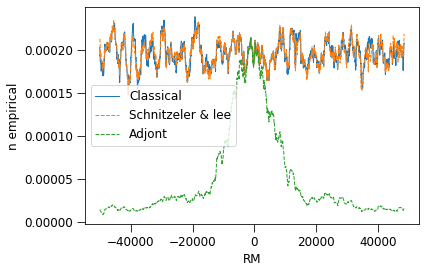

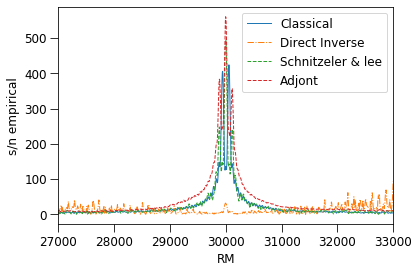

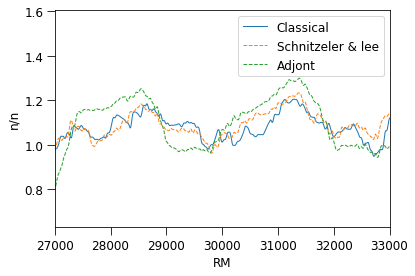

In [12]:
def plot_empireical_noise(mylist):
    [t, s1, s2, s3, s4] = mylist
    #plt.figure(figsize=(12,7), dpi=100)
    plt.figure()
    plt.plot(t, s1,'-', label='Classical')
    #plt.plot(t, s2, '-.',label='Direct Inverse')
    plt.plot(t, s3,'--' ,label='Schnitzeler & lee')
    plt.plot(t, s4,'--' ,label='Adjont')
    plt.xlabel('RM')
    plt.ylabel('n empirical')
    #plt.xlim(rm - width, rm + width)
    plt.legend()
    plt.show()
    
    return


noise_range = len(s1)
s21 = np.abs(FDF1[:noise_range])/s1[:noise_range]
s22 = np.abs(FDF2[:noise_range])/s2[:noise_range]
s23 = np.abs(FDF3[:noise_range])/s3[:noise_range]
s24 = np.abs(FDF4[:noise_range])/s4[:noise_range]
             
def plot_empireical_sn(mylist):
    [t, s1, s2, s3, s4] = mylist
    #plt.figure(figsize=(12,7), dpi=100)
    plt.figure()
    plt.plot(t, s1,'-', label='Classical')
    plt.plot(t, s2, '-.',label='Direct Inverse')
    plt.plot(t, s3,'--' ,label='Schnitzeler & lee')
    plt.plot(t, s4,'--' ,label='Adjont')
    plt.xlabel('RM')
    plt.ylabel('s/n empirical')
    plt.xlim(rm - width, rm + width)
    #plt.xlim(rm - width, rm + width)
    plt.legend()
    plt.show()
    
    return

def plot_compare_mynoise(mylist):
    [t, s1, s2, s3, s4, sigma1, sigma2, sigma3] = mylist
    #plt.figure(figsize=(12,7), dpi=100)
    plt.figure()
    plt.plot(t, s1/sigma1[:noise_range],'-', label='Classical')
    #plt.plot(t, s2/sigma2[:noise_range], '-.',label='Direct Inverse')
    plt.plot(t, s3/sigma1[:noise_range],'--' ,label='Schnitzeler & lee')
    plt.plot(t, s4/sigma3[:noise_range],'-.' ,label='Adjont')
    plt.xlabel('RM')
    plt.ylabel('n/n')
    plt.xlim(rm - width, rm + width)
    #plt.ylim(0,1.5)
    #plt.xlim(rm - width, rm + width)
    plt.legend()
    plt.show()
    
    return

my_noise_list = (my_rm_range, s1, s2, s3, s4)
my_noise_list2 = (my_rm_range, s21, s22, s23, s24)
    
plot_empireical_noise(my_noise_list)
    
plot_empireical_sn(my_noise_list2)

my_nn_list = [my_rm_range, s1, s2, s3, s4, sigma_1, sigma_2, sigma_3]

plot_compare_mynoise(my_nn_list)

e1 rm 30057.799413500634peak amp 0.08075366821996212
e2 rm -38767.15932007106peak amp 5.1117251628539115
e3 rm 30000.01549914101peak amp 0.0967509590547536
e4 rm 29999.988775203852peak amp 0.012416092126510504


C:\Users\afine\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.
C:\Users\afine\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


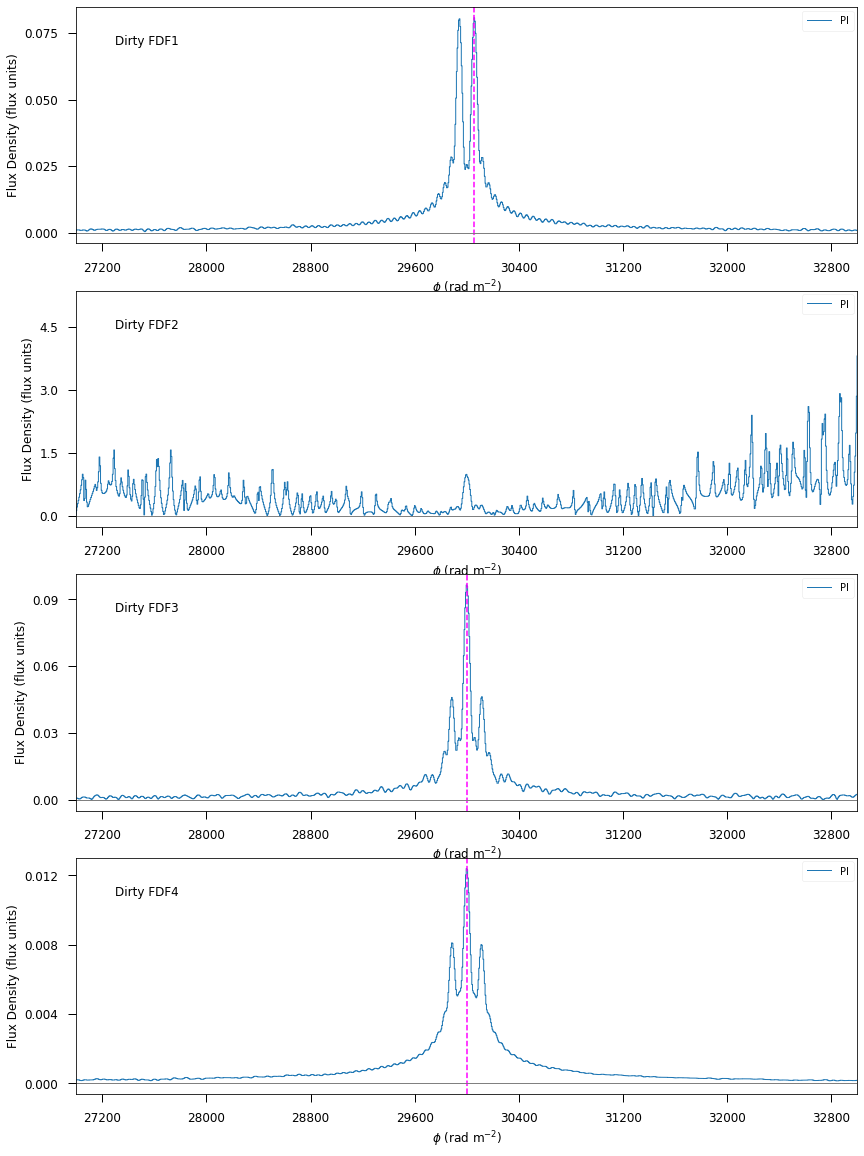

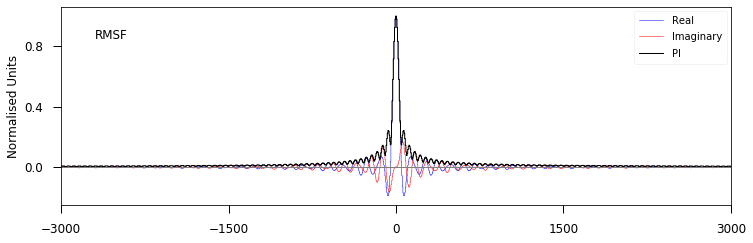

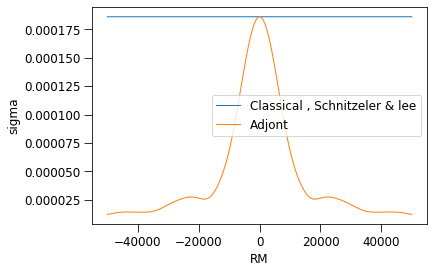

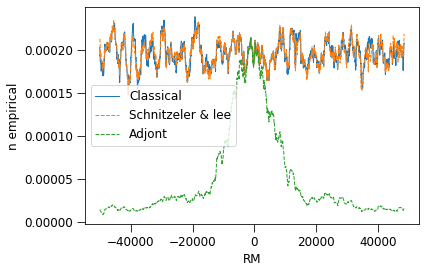

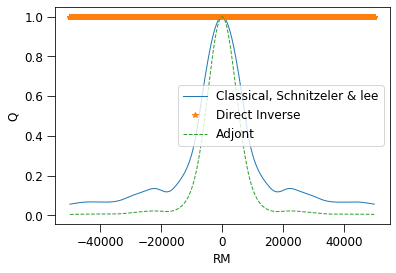

theory
s/n max for classical  433.9070430044011
s/n max for direct 77.96050047753106
s/n max for / schnitzeler lee 518.6709965698908
s/n max for adjoint 598.0829551265133


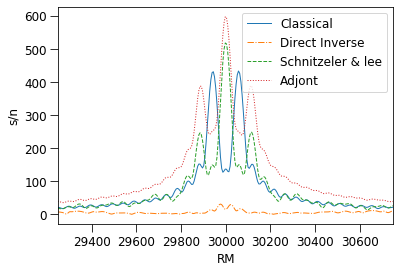

emp
s/n max for classical  423.9038049252076
s/n max for direct 287.78898508036497
s/n max for / schnitzeler lee 495.7832920886186
s/n max for adjoint 560.2074955485001


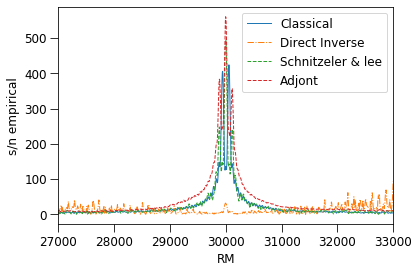

s/q max for classical 0.8393488706718436
s/q max for direct 5.106658120533125
s/q max for schnitzeler & lee  0.9991562672744244
s/q max for adjoint 0.9991562672744244


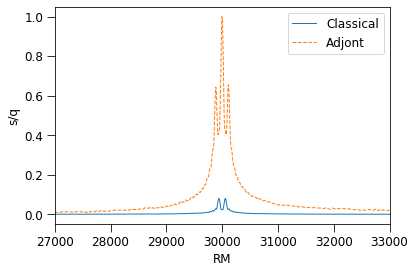

In [65]:

fig = plot_fdf_fig(aDict1, aDict2, aDict3, aDict4, mDict1, mDict2, mDict3, mDict4, fwhmRMSF=None,
                      gaussParm=[], vLine=None, fig=None,units='flux units')

fig.show()
fig2 = plot_rmsf_fig(aDict1, fwhmRMSF=None,
                      gaussParm=[], vLine=None, fig=None,units='flux units')
fig2.show()
plot_sigma(mylist1)
plot_empireical_noise(my_noise_list)
plot_sensitivity(mylist2)

print('theory')
print('s/n max for classical  ' + str(s_n1_max))
print('s/n max for direct ' + str(s_n2_max))
print('s/n max for / schnitzeler lee ' + str(s_n3_max))
print('s/n max for adjoint ' +str(s_n4_max))
plot_s_n(mylist3)

print('emp')
print('s/n max for classical  ' + str(np.max(s21)))
print('s/n max for direct ' + str(np.max(s22)))
print('s/n max for / schnitzeler lee ' + str(np.max(s23)))
print('s/n max for adjoint ' +str(np.max(s24)))
plot_empireical_sn(my_noise_list2)

print('s/q max for classical ' + str(s_q1_max))
print('s/q max for direct ' + str(s_q2_max))
print('s/q max for schnitzeler & lee  ' +str(s_q4_max))
print('s/q max for adjoint ' +str(s_q4_max))
plot_s_q(mylist4)



In [14]:


q_samples = 5


nSamples = q_samples 

#p_tilda_orig

start = -45000
stop = 45000

my_phiArr_radm2 = np.linspace(start, stop, 100)

q1 = np.ones(len(my_phiArr_radm2)) # class
q2 = np.ones(len(my_phiArr_radm2)) # direct
q3 = np.ones(len(my_phiArr_radm2)) # paper
q4 = np.ones(len(my_phiArr_radm2)) # adjont
q5 = np.ones(len(my_phiArr_radm2)) # true adjont
q6 = np.ones(len(my_phiArr_radm2)) # true direct
    
for i in range(len(my_phiArr_radm2)):
    my_rm = my_phiArr_radm2[i]
               
    p_tilda = sim.bandwidth_avg_array(f, ban, my_rm, xi_knot, p)
               
    size_f = len(f)
    noise_1 =  np.random.normal(0, s, size_f)
    noise_2 =  np.random.normal(0, s, size_f)
    dq = s * np.ones(size_f)
    du = s * np.ones(size_f)
    q = np.real(p_tilda) + noise_1
    u = np.imag(p_tilda) + noise_2
    p_tilda = q + 1.0j * u
               
   #imput_data = list = [freq_Hz, q, u,  dq, du]
    data=[f, np.real(p_tilda), np.imag(p_tilda), dq, du]




    # Run RM-synthesis on the spectra

    e_num = 1
    new_mDict10, new_aDict10 = run_rmsynth(data           = data,
                polyOrd = polyOrd,
                phiMax_radm2 = phiMax_radm2,
                dPhi_radm2 = dPhi_radm2,
                nSamples       = nSamples,
                weightType     = weightType,
                fitRMSF        = fitRMSF,
                noStokesI      = noStokesI,
                nBits          = nBits,
                showPlots      = showPlots,
                debug          = debug,
                verbose        = verbose,
                units          = units,
                e_num          = e_num)
    e_num = 2
    new_mDict20, new_aDict20 = run_rmsynth(data           = data,
                polyOrd = polyOrd,
                phiMax_radm2 = phiMax_radm2,
                dPhi_radm2 = dPhi_radm2,
                nSamples       = nSamples,
                weightType     = weightType,
                fitRMSF        = fitRMSF,
                noStokesI      = noStokesI,
                nBits          = nBits,
                showPlots      = showPlots,
                debug          = debug,
                verbose        = verbose,
                units          = units,
                e_num          = e_num)

    e_num = 3
    new_mDict30, new_aDict30= run_rmsynth(data           = data,
                polyOrd = polyOrd,
                phiMax_radm2 = phiMax_radm2,
                dPhi_radm2 = dPhi_radm2,
                nSamples       = nSamples,
                weightType     = weightType,
                fitRMSF        = fitRMSF,
                noStokesI      = noStokesI,
                nBits          = nBits,
                showPlots      = showPlots,
                debug          = debug,
                verbose        = verbose,
                units          = units,
                e_num          = e_num)

    e_num = 4
    new_mDict40, new_aDict40 = run_rmsynth(data           = data,
                polyOrd = polyOrd,
                phiMax_radm2 = phiMax_radm2,
                dPhi_radm2 = dPhi_radm2,
                nSamples       = nSamples,
                weightType     = weightType,
                fitRMSF        = fitRMSF,
                noStokesI      = noStokesI,
                nBits          = nBits,
                showPlots      = showPlots,
                debug          = debug,
                verbose        = verbose,
                units          = units,
                e_num          = e_num)
    

    q1[i] = new_mDict10['ampPeakPIfitEff'] 
    q2[i] = new_mDict20['ampPeakPIfitEff'] 
    q3[i] = new_mDict30['ampPeakPIfitEff'] 
    q4[i] = new_mDict40['ampPeakPIfitEff']
    
    q2_phi = new_aDict20['phiArr_radm2']
    q2_ban = q2_phi[1] - q2_phi[0]
    q2_phi1 = q2_phi[q2_phi <my_rm + 5*q2_ban]
    #print(my_rm)
    #print(q2_phi[0])
    q2_phi2 = q2_phi[q2_phi <my_rm - 2* q2_ban]
    stop = np.where(q2_phi == np.max(q2_phi1))[0][0]
    start = np.where(q2_phi == np.max(q2_phi2))[0][0]
    
    my_fdf2 = np.abs(new_aDict20["dirtyFDF"])
    my_fdf2  = my_fdf2[start:stop]
    #my_fdf = my_fdf[my_fdf < 1.5]
    q6[i] = np.max(my_fdf2)
    
    # better adjoint

    my_fdf5 = np.abs(new_aDict40["dirtyFDF"])
    my_fdf5  = my_fdf5[start:stop]
    #my_fdf = my_fdf[my_fdf < 1.5]
    q5[i] = np.max(my_fdf5)
    
my_q_list = (my_phiArr_radm2, q1, q2, q3, q4, q5, q6)
               


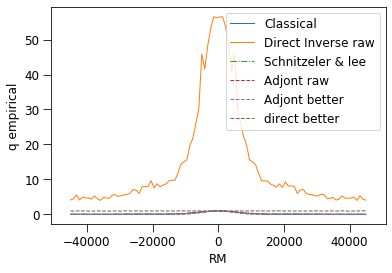

In [15]:
def plot_empireical_q(mylist):
    [t, q1, q2, q3, q4, q5, q6] = mylist
    #plt.figure(figsize=(12,7), dpi=100)
    plt.figure()
    plt.plot(t, q1,'-', label='Classical')
    plt.plot(t, q2, '-',label='Direct Inverse raw')
    plt.plot(t, q3,'-.' ,label='Schnitzeler & lee')
    plt.plot(t, q4,'--' ,label='Adjont raw')
    plt.plot(t, q5,'--' ,label='Adjont better')
    plt.plot(t, q6,'--' ,label='direct better')
    plt.xlabel('RM')
    plt.ylabel('q empirical')
    plt.xlim(-51000, 51000)
    #plt.ylim(0.5,1.2)
    plt.legend()
    plt.show()
    
    return
my_q_list = (my_phiArr_radm2, q1, q2, q3, q4, q5, q6)
    
plot_empireical_q(my_q_list)

In [16]:
weightArr = new_aDict10["weightArr"]
#weightArr = mDict1['dQUArr']
phiArr_radm2 = my_phiArr_radm2
dQUArr = du 
delta_v =  ban
freqArr_Hz = f
nPhi = len(phiArr_radm2)

        
t = phiArr_radm2
    
my_new_noise = [t, sigma_1, sigma_2, sigma_3]

e_32 = sigma_1
e_33 = sigma_2
e_34 = sigma_3
    

      
nPhi = len(phiArr_radm2)

k = np.sum(weightArr)**-1
        
sens_1 = np.ones(nPhi)
sens_2 = np.ones(nPhi)
sens_3 = np.ones(nPhi)
    #r = myarray
    
delta_v =  bandwidth(freqArr_Hz)
    
for i in range(nPhi):
        
        
    #r_i is an array, of size v
            
    r_i = rotation_op(delta_v, freqArr_Hz, phiArr_radm2[i])
    
    sens_1[i] = k * np.sum(weightArr * np.abs(r_i)) #equation 35
        
    #sens_2[i] = k * np.sum(weightArr * (np.abs(r_i) * np.abs(r_i**-1))) # equation 36 alternate code
        
    sens_3[i] = k * np.sum(weightArr * (np.abs(r_i)**2)) # equation 39
        
    #r[i] = r_i * r_i**-1    
        
    t = phiArr_radm2
    
my_new_q = [t, sens_1, sens_2, sens_3]

e_35 = sens_1
e_36 = sens_2
e_39 = sens_3
    

    


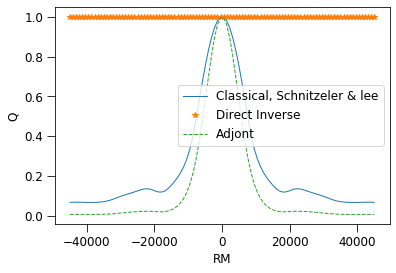

In [17]:
plot_sensitivity(my_new_q)

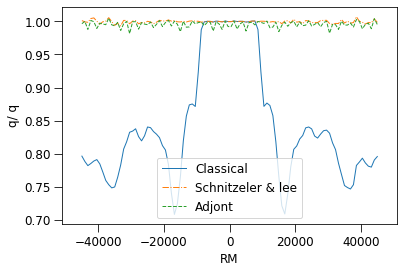

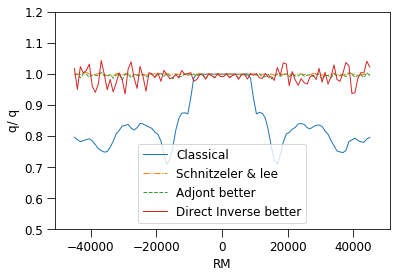

In [22]:
def plot_compare_q(mylist):
    (my_phiArr_radm2, q1, q2, q3, q4, q5, q6, sens_1, sens_2, sens_3) = mylist
    #plt.figure(figsize=(12,7), dpi=100)
    plt.figure()
    plt.plot(t, q1/sens_1,'-', label='Classical')
    #plt.plot(t, q2/sens_2, '-',label='Direct Inverse ')
    plt.plot(t, q3/sens_1,'-.' ,label='Schnitzeler & lee')
    #plt.plot(t, q4/sens_3,'--' ,label='Adjont not beter')
    plt.plot(t, q5/sens_3,'--' ,label='Adjont')
    #plt.plot(t, q6/sens_2, '-',label='Direct Inverse better')
    plt.xlabel('RM')
    plt.ylabel('q/ q')
    plt.xlim(-51000, 51000)
    #plt.ylim(0.5,1.2)
    plt.legend()
    plt.show()
    
    return

def plot_compare_q2(mylist):
    (my_phiArr_radm2, q1, q2, q3, q4, q5, q6, sens_1, sens_2, sens_3) = mylist
    #plt.figure(figsize=(12,7), dpi=100)
    plt.figure()
    plt.plot(t, q1/sens_1,'-', label='Classical')
    #plt.plot(t, q2/sens_2, '-',label='Direct Inverse raw')
    plt.plot(t, q3/sens_1,'-.' ,label='Schnitzeler & lee')
    #plt.plot(t, q4/sens_3,'--' ,label='Adjont raw')
    plt.plot(t, q5/sens_3,'--' ,label='Adjont better')
    plt.plot(t, q6/sens_2, '-',label='Direct Inverse better')
    plt.xlabel('RM')
    plt.ylabel('q/ q')
    plt.xlim(-51000, 51000)
    plt.ylim(0.5,1.2)
    plt.legend()
    plt.show()
    
    return

def plot_compare_q3(mylist):
    (my_phiArr_radm2, q1, q2, q3, q4, q5, q6, sens_1, sens_2, sens_3) = mylist
    #plt.figure(figsize=(12,7), dpi=100)
    plt.figure()
    plt.plot(t, q1,'-', label='class empiracl ')
    plt.plot(t, sens_1, '--',label='class theory')
    #plt.plot(t, q3/sens_1,'-.' ,label='Schnitzeler & lee')
    #plt.plot(t, q4/sens_3,'--' ,label='Adjont raw')
    #plt.plot(t, q5/sens_3,'--' ,label='Adjont better')
    #plt.plot(t, q6, '-',label='Direct Inverse better')
    plt.xlabel('RM')
    plt.ylabel('mag')
    plt.xlim(-51000, 51000)
    #plt.ylim(0.5,1.2)
    plt.legend()
    plt.show()
    return

def plot_compare_q4(mylist):
    (my_phiArr_radm2, q1, q2, q3, q4, q5, q6, sens_1, sens_2, sens_3) = mylist
    #plt.figure(figsize=(12,7), dpi=100)
    plt.figure()
    plt.plot(t, q2,'-', label='direct empiracl ')
    plt.plot(t, sens_2, '--',label='direct theory')
    #plt.plot(t, q3/sens_1,'-.' ,label='Schnitzeler & lee')
    #plt.plot(t, q4/sens_3,'--' ,label='Adjont raw')
    #plt.plot(t, q5/sens_3,'--' ,label='Adjont better')
    plt.plot(t, q6, '-*',label='Direct Inverse better')
    plt.xlabel('RM')
    plt.ylabel('mag')
    plt.xlim(-51000, 51000)
    #plt.ylim(0.5,1.2)
    plt.legend()
    plt.show()
    return
def plot_compare_q5(mylist):
    (my_phiArr_radm2, q1, q2, q3, q4, q5, q6, sens_1, sens_2, sens_3) = mylist
    #plt.figure(figsize=(12,7), dpi=100)
    plt.figure()
    plt.plot(t, q3,'-', label='chnitzeler & lee empiracl ')
    plt.plot(t, sens_1, '--',label='chnitzeler & lee theory')
    #plt.plot(t, q3/sens_1,'-.' ,label='Schnitzeler & lee')
    #plt.plot(t, q4/sens_3,'--' ,label='Adjont raw')
    #plt.plot(t, q5/sens_3,'--' ,label='Adjont better')
    #plt.plot(t, q6/sens_2, '-',label='Direct Inverse better')
    plt.xlabel('RM')
    plt.ylabel('mag')
    plt.xlim(-51000, 51000)
    #plt.ylim(0.5,1.2)
    plt.legend()
    plt.show()
    return
def plot_compare_q6(mylist):
    (my_phiArr_radm2, q1, q2, q3, q4, q5, q6, sens_1, sens_2, sens_3) = mylist
    #plt.figure(figsize=(12,7), dpi=100)
    plt.figure()
    plt.plot(t, q4,'-', label='Adjont empirical ')
    plt.plot(t, sens_3, '--',label='Adjont theory')
    plt.plot(t, q3/sens_1,'-.' ,label='Schnitzeler & lee')
    plt.plot(t, q4/sens_3,'--' ,label='Adjont')
    #plt.plot(t, q5,'--' ,label='Adjont better')
    #plt.plot(t, q6/sens_2, '-',label='Direct Inverse better')
    plt.xlabel('RM')
    plt.ylabel('Flux Density (Flux Units)')
    plt.xlim(-51000, 51000)
    #plt.ylim(0.5,1.2)
    plt.legend()
    plt.show()
    return


my_compare_q_list = (my_phiArr_radm2, q1, q2, q3, q4, q5, q6, sens_1, sens_2, sens_3)
    
plot_compare_q(my_compare_q_list)

plot_compare_q2(my_compare_q_list)


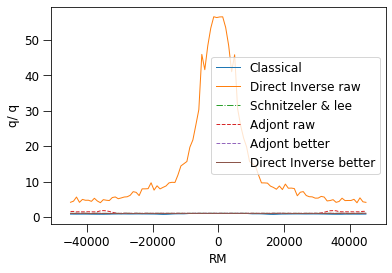

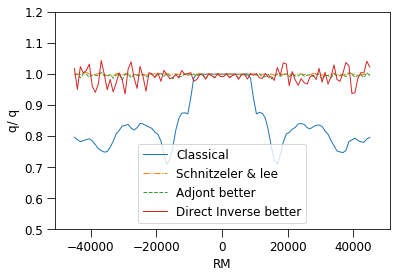

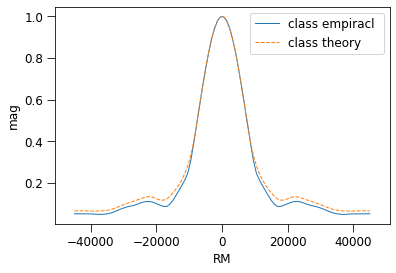

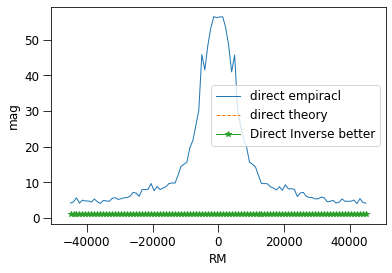

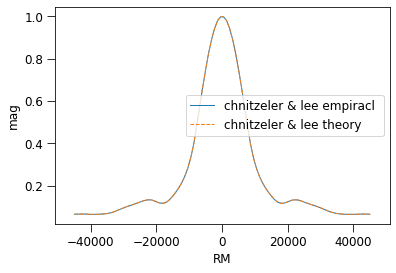

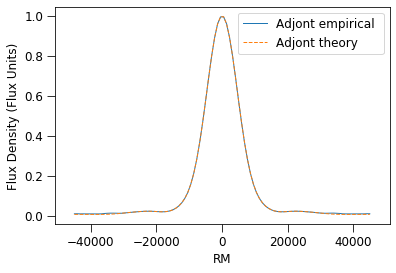

In [19]:
my_compare_q_list = (my_phiArr_radm2, q1, q2, q3, q4, q5, q6, sens_1, sens_2, sens_3)
    
plot_compare_q(my_compare_q_list)
plot_compare_q2(my_compare_q_list)
plot_compare_q3(my_compare_q_list)
plot_compare_q4(my_compare_q_list)
plot_compare_q5(my_compare_q_list)
plot_compare_q6(my_compare_q_list)
